### Poisson distribution

As poisson is not a symmetrical distribution it is harder to mark an anomaly

An approach could be consider as normal all points with the largest mass function value summing up to a percentage

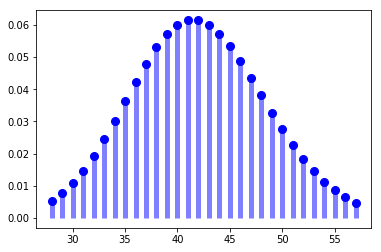

In [11]:
# Example 
# consider the following Poisson distribution

from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

mu = 42

threshold = 0.01

fig, ax = plt.subplots(1, 1)

x = np.arange(poisson.ppf(threshold, mu),
               poisson.ppf(1 - threshold, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

Points poisson.ppf(threshold, mu) and poisson.ppf(1 - threshold, mu) could be considered as the anomalies pointers

For example consider we have the following centers for the poisson distributions

$$array([1,10,15,28]) $$
       
with probabilities 

$$ gammas = [0.25, 0.25, 0.25, 0.25] $$

In [15]:
lambdas = np.array([1,10,15,28])

gammas = np.array([0.25, 0.25, 0.25, 0.25])

Check if it part of any any of the distribution

In [17]:
threshold = 0.01
test_value = 5
print('Testing for value', test_value)

for lamdba_i, gamma_i in zip(lambdas, gammas):
    low_bound = poisson.ppf(threshold/gamma_i, lamdba_i)
    high_bound = poisson.ppf(1 - threshold/gamma_i, lamdba_i)
    print('The thresholds are:', low_bound, 'and:', high_bound)
    if test_value >= low_bound and test_value <= high_bound:
        print('It is within the bounds')
    else:
        print('Outside the bounds')
    print()

Testing for value 5
The thresholds are: 0.0 and: 3.0
Outside the bounds

The thresholds are: 5.0 and: 16.0
It is within the bounds

The thresholds are: 9.0 and: 22.0
Outside the bounds

The thresholds are: 19.0 and: 38.0
Outside the bounds



In [27]:
np.any(np.array([test_value >= poisson.ppf(threshold/gamma_i, lamdba_i) and test_value <= poisson.ppf(1 - threshold/gamma_i, lamdba_i)
          for lamdba_i, gamma_i in zip(lambdas, gammas)]))

True

An alternative for an easier anomaly score would be to consider as normal all points with a mass function value larger than a threshold.

In [37]:
poisson.pmf(42, 53.9632079711726)

0.014605089858124745